In [1]:
import os
import sys
import numpy as np

import matplotlib.pyplot         as plt
import mlem.mlem_reconstruct     as mr
import antea.image.fom_functions as fomf

#sys.stdout = open(os.devnull, "w") ## Prevents from printing

In [2]:
path_to_mlem     = '/Users/carmenromoluque/tofpet3d/lib/libmlem.so'
reco_prefix_base = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/nest/images_reco/'

ths        = [0, 0.5, 1.0, 1.5]
tofs       = [20, 100, 150]
n_coinc    = [63576153, 63681721, 63576153, 63576153]
n_iter     = 100
save_every = 2

#sys.stdout = sys.__stdout__ ##Allows printing again

In [3]:
def read_images(th, tof, nc):
    rec = mr.MLEMReconstructor(libpath=path_to_mlem)
    rec.prefix = reco_prefix_base + f'im_th{th}_TOF{tof}ps_{nc}coinc_iter'
    return np.array([rec.read_image(i) for i in range(0, n_iter, save_every)])

from collections import namedtuple

tof_threshold = namedtuple('tof_threshold', 'tof, th')
the_images = {tof_threshold(tof=tof, th=th): read_images(th, tof, nc) 
              for tof in tofs 
              for th, nc in zip(ths, n_coinc)}

Sensitivity matrix not specified: assuming a matrix of 1s.
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Sensitivity matrix not specified: assumin

Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Sensitivity matrix not specified: assuming a matrix of 1s.
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 

In [4]:
the_images[tof_threshold(tof=20, th=0)]

array([[[[0.00000000e+00, 5.78835487e-01, 4.21164513e-01, ...,
          0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [6.50471330e-01, 0.00000000e+00, 0.00000000e+00, ...,
          2.19652150e-03, 0.00000000e+00, 0.00000000e+00],
         [3.46567854e-02, 3.09322234e-02, 0.00000000e+00, ...,
          3.34381387e-02, 0.00000000e+00, 1.82648435e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 3.82560515e-03, ...,
          7.76758417e-04, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          7.08590597e-02, 7.24678263e-02, 0.00000000e+00],
         [6.70258462e-01, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 3.16660735e-03, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.83939719e-01, 0.00000000e+00, 0.00000000e+00, ...,
          8.25553946e-03, 5.03205368e-03, 0.00000000e+00],
        

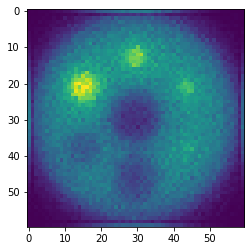

In [5]:
plt.imshow(the_images[(20, 0)][8,:,:,29]);

In [6]:
def imshow_slice_integrated_along_z(ax, th, tof, it, z_slice):
    image_slice = the_images[tof_threshold(tof=tof, th=th)][int(it/save_every-1),:,:,z_slice]
    im_integrated_along_z = np.sum(image_slice, axis=2).transpose()
    ax.imshow(im_integrated_along_z, origin='lower')
    ax.set_title(f'TOF threshold = {th} pes', fontsize=16)
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')

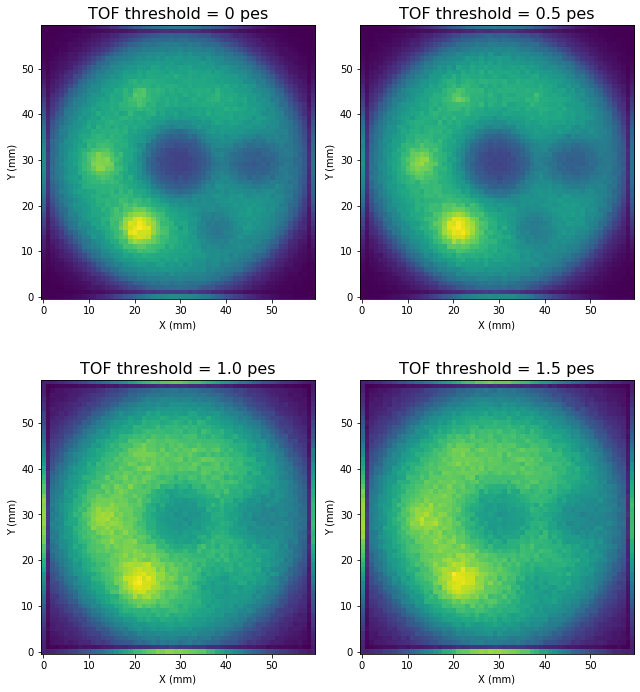

In [7]:
it       = 16
z_slice  = slice(25,35)
fig, axs = plt.subplots(2,2, figsize=(9, 10))
for ax, th in zip(axs.flatten(), ths):
    imshow_slice_integrated_along_z(ax, th, it=it, z_slice=z_slice, tof=20)
plt.tight_layout()
plt.show()

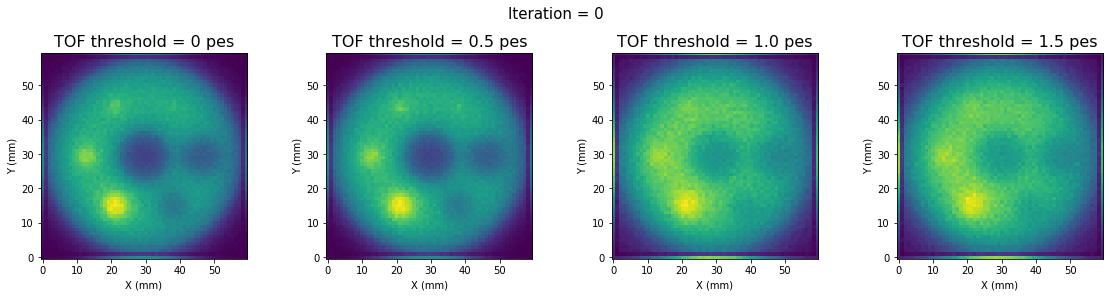

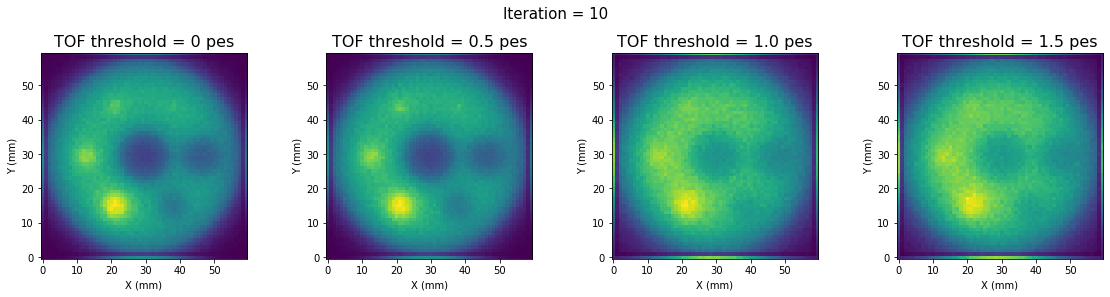

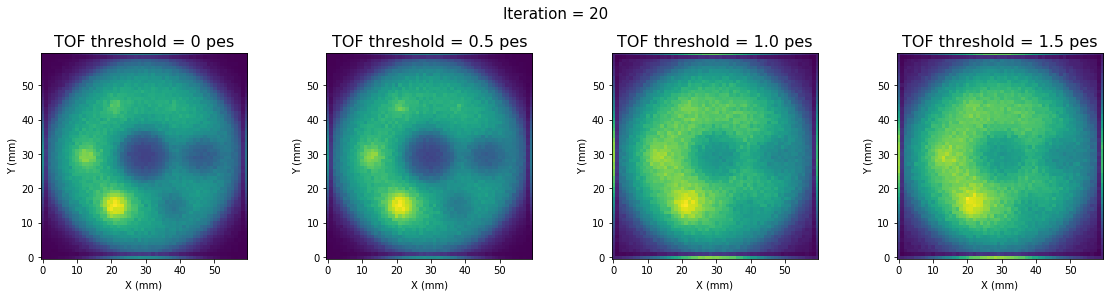

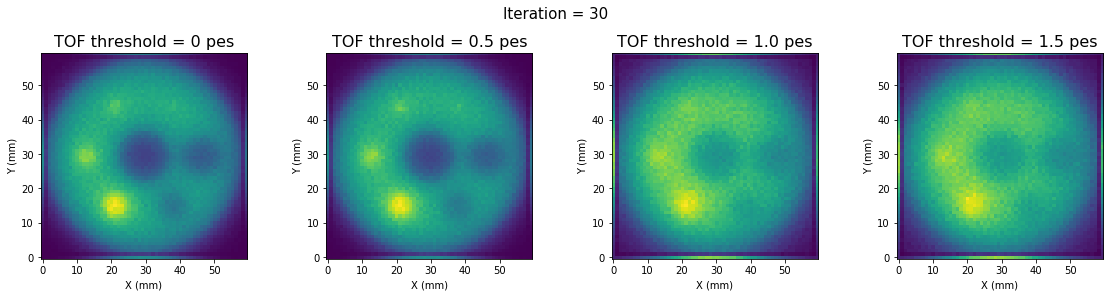

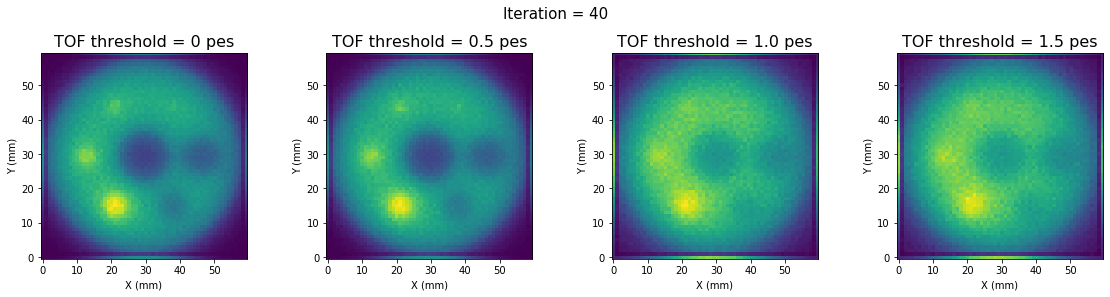

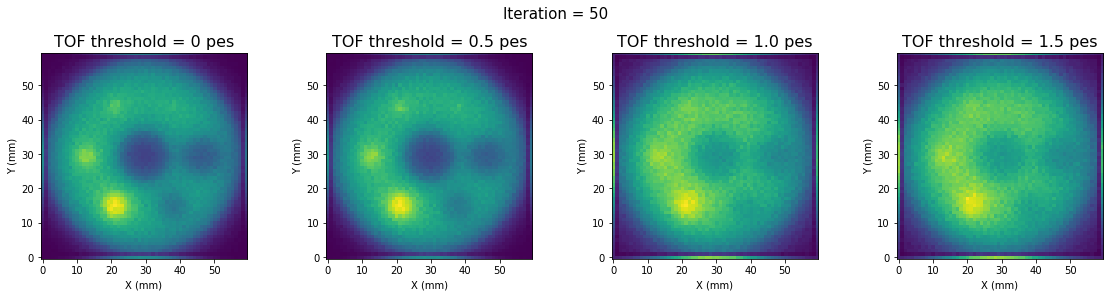

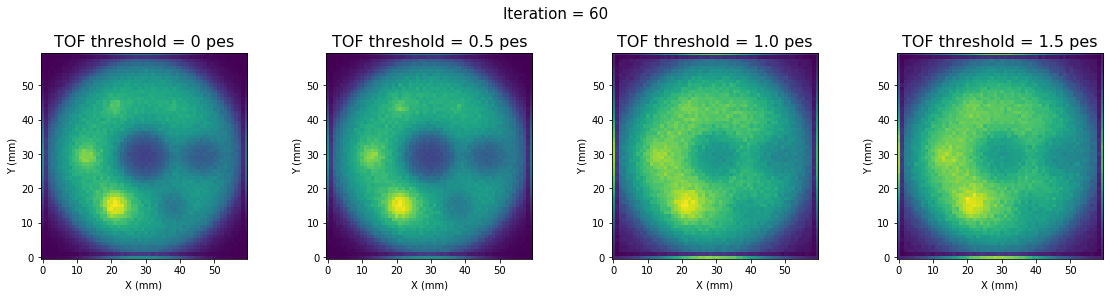

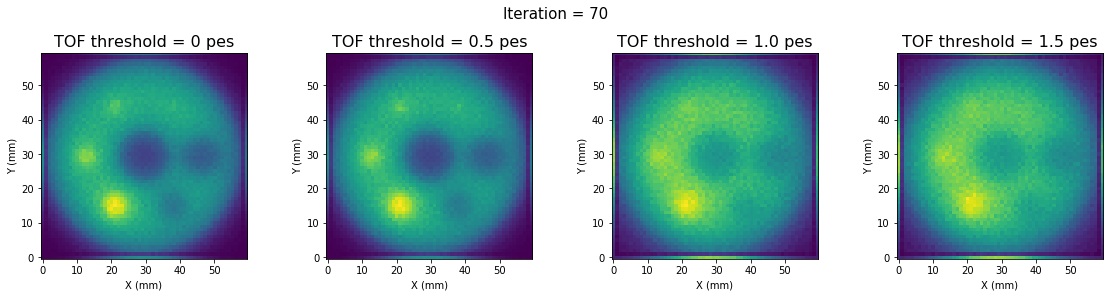

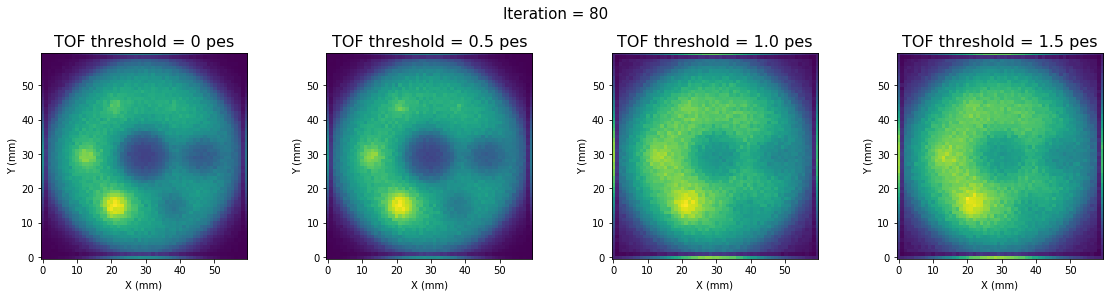

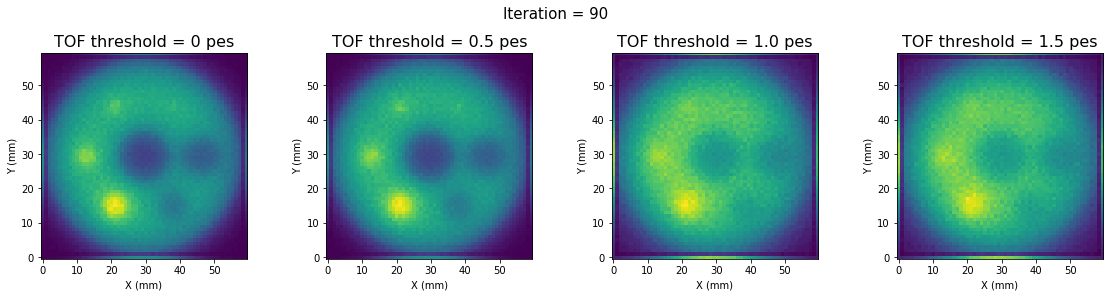

In [8]:
z_slice = slice(25,35)
for it in range(0, n_iter, 10):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    fig.suptitle(f'Iteration = {it}', fontsize=15)
    
    for ax, th in zip(axs.flatten(), ths):
        imshow_slice_integrated_along_z(ax, th, it=it, z_slice=z_slice, tof=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.82)
    plt.show()

## Image parameters

In [9]:
sig_intensity  =  4
bckg_intensity =  1
radial_pos     = 50.
bckg_radius    =  4.
phi0           = np.pi/6
phi_step       = np.pi/3
n_phi          = 6

hot_radii   = [4., 6.5, 8.5, 11.]
cold_radii  = [14., 18.5]
all_radii   = hot_radii + cold_radii

hot_angles  = [np.pi/3, 2*np.pi/3, 3*np.pi/3, 4*np.pi/3]
cold_angles = [5*np.pi/3, 6*np.pi/3]

x_size = y_size = z_size = 180
x_bins = y_bins = z_bins =  60

radii  = hot_radii  + cold_radii
angles = hot_angles + cold_angles

### SNR vs iteration number

In [10]:
the_images[(20, 0)].shape

(50, 60, 60, 60)

In [11]:
num_hot     = 4
num_cold    = 2
num_spheres = num_hot + num_cold

sph_thresh_tof = namedtuple('sph_thresh_tof', 'sph, th, tof')
snr_err        = namedtuple('snr_err'       , 'snrs, errs')

def get_snrs(images, tof_and_thr, n_sph):
    calculate_snrs_and_errs = lambda images: fomf.snr3d(images, radii[n_sph], radial_pos, angles[n_sph], 
                                                        bckg_radius, phi0, phi_step, n_phi, 
                                                        x_size, y_size, z_size,
                                                        x_bins, y_bins, z_bins)
    all_images = tuple(map(calculate_snrs_and_errs, images[tof_and_thr]))
    snrs = [r[0] for r in all_images]
    errs = [e[1] for e in all_images]
    print(tof_and_thr, n_sph)
    return snr_err(snrs=snrs, errs=errs)

snrs = {sph_thresh_tof(sph=n_sph, th=th, tof=tof) :
        get_snrs(the_images, tof_threshold(tof=tof, th=th), n_sph)
        for tof   in tofs
        for th    in ths
        for n_sph in range(num_spheres)}

tof_threshold(tof=20, th=0) 0
tof_threshold(tof=20, th=0) 1
tof_threshold(tof=20, th=0) 2
tof_threshold(tof=20, th=0) 3
tof_threshold(tof=20, th=0) 4
tof_threshold(tof=20, th=0) 5
tof_threshold(tof=20, th=0.5) 0
tof_threshold(tof=20, th=0.5) 1
tof_threshold(tof=20, th=0.5) 2
tof_threshold(tof=20, th=0.5) 3
tof_threshold(tof=20, th=0.5) 4
tof_threshold(tof=20, th=0.5) 5
tof_threshold(tof=20, th=1.0) 0
tof_threshold(tof=20, th=1.0) 1
tof_threshold(tof=20, th=1.0) 2
tof_threshold(tof=20, th=1.0) 3
tof_threshold(tof=20, th=1.0) 4
tof_threshold(tof=20, th=1.0) 5
tof_threshold(tof=20, th=1.5) 0
tof_threshold(tof=20, th=1.5) 1
tof_threshold(tof=20, th=1.5) 2
tof_threshold(tof=20, th=1.5) 3
tof_threshold(tof=20, th=1.5) 4
tof_threshold(tof=20, th=1.5) 5
tof_threshold(tof=100, th=0) 0
tof_threshold(tof=100, th=0) 1
tof_threshold(tof=100, th=0) 2
tof_threshold(tof=100, th=0) 3
tof_threshold(tof=100, th=0) 4
tof_threshold(tof=100, th=0) 5
tof_threshold(tof=100, th=0.5) 0
tof_threshold(tof=100, th

In [12]:
len(snrs)

72

In [13]:
#%%prun
#xtof = [20]
#xth  = [0.5]
#snrs = {sph_thresh_tof(sph=n_sph, th=th, tof=tof): get_snrs(the_images, tof_threshold(tof=tof, th=th), n_sph)
#        for tof   in xtof
#        for th    in xth
#        for n_sph in range(num_spheres)}

In [13]:
## Configuration for plots ##
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = 10, 7.5

## colors
tableau = [( 31, 119, 180), (174, 199, 232), (255, 127,  14), (255, 187, 120),
           ( 44, 160,  44), (152, 223, 138), (214,  39,  40), (255, 152, 150),
           (148, 103, 189), (197, 176, 213), (140,  86,  75), (196, 156, 148),
           (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
           (188, 189,  34), (219, 219, 141), ( 23, 190, 207), (158, 218, 229), 
           (218,  60,  78), (35,  180, 203)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau)):
    r, g, b = tableau[i]
    tableau[i] = (r / 255., g / 255., b / 255.)

blue       = tableau[0]
green      = tableau[4]
fucsia     = tableau[6]
light_red  = tableau[20]
light_blue = tableau[21]

##               th = 0pes        0.5pes           1.0pes        1.5pes 
sph_colors = [['deepskyblue', 'darkcyan'     ,  light_blue     , 'blue'  ], #sph 0 hot
              [ light_red   , 'firebrick'    , 'indianred'     , 'red'   ], #sph 1 hot
              ['olive'      , 'yellowgreen'  , 'palegreen'     , 'green' ], #sph 2 hot
              ['sandybrown' , 'darkgoldenrod', 'yellow'        , 'orange'], #sph 3 hot
              ['navy'       , 'darkslateblue', 'cornflowerblue', 'blue'  ], #sph 4 cold
              ['k'          , 'dimgrey'      , 'silver'        , 'grey'  ]] #sph 5 cold

colors = {sph_thresh_tof(sph=n_sph, th=th, tof=None): color
          for n_sph, colors in enumerate(sph_colors) 
          for color, th     in zip(colors, ths)}

In [45]:
from typing import Sequence
from typing import Dict

sel_n_iter = 100
def plot_snr_sphs(snrs:    Dict[sph_thresh_tof, snr_err], 
                  spheres: Sequence[int], 
                  ths:     Sequence[float], 
                  colors:  Dict[sph_thresh_tof, 'Color'],
                  tof:     int,
                  without_colors=False):
    images_wanted = int(sel_n_iter/save_every)
    for th in ths:
        for n_sphere in spheres:
            sphere = snrs  [sph_thresh_tof(sph=n_sphere, th=th, tof=tof)]
            color  = colors[sph_thresh_tof(sph=n_sphere, th=th, tof=None)]
            plt.errorbar(x = list(range(0, sel_n_iter, save_every)), 
                         y =    sphere.snrs[:images_wanted], 
                         yerr = sphere.errs[:images_wanted], 
                         xerr = None,
                         color = color, 
                         marker = 's', 
                         capsize = 3, 
                         label = f'sph{n_sphere}, ({all_radii[n_sphere]} rad)')#, thr={th} pes')

def plot_snr_sphs2(snrs:    Dict[sph_thresh_tof, snr_err], 
                   spheres: Sequence[int], 
                   ths:     Sequence[float], 
                   tof:     int):
    images_wanted = int(sel_n_iter/save_every)
    for th in ths:
        for n_sphere in spheres:
            sphere = snrs  [sph_thresh_tof(sph=n_sphere, th=th, tof=tof)]
            plt.errorbar(x = list(range(0, sel_n_iter, save_every)), 
                         y =    sphere.snrs[:images_wanted], 
                         yerr = sphere.errs[:images_wanted], 
                         xerr = None,
                         marker = 's', 
                         capsize = 3, 
                         label = f'thr={th} pes')
            
twelve_colors = ['']
colors_nice = np.array(['coral', 'maroon', 'springgreen', 'dimgrey',
                        'navy', 'cornflowerblue', 
                        'crimson', 'palevioletred', 'gold',
                        'cadetblue', 'olive', 'green'])
def plot_snr_sphs3(snrs:     Dict[sph_thresh_tof, snr_err], 
                   n_sphere: int, 
                   ths:      Sequence[float], 
                   tofs:     Sequence[float],
                   colors:   Sequence[float]):
    images_wanted = int(sel_n_iter/save_every)
    n_col = 0
    for th in ths:
        for tof in tofs:
            sphere = snrs  [sph_thresh_tof(sph=n_sphere, th=th, tof=tof)]
            #color  = colors[sph_thresh_tof(sph=n_sphere, th=th, tof=None)]
            plt.errorbar(x = list(range(0, sel_n_iter, save_every)), 
                         y =    sphere.snrs[:images_wanted], 
                         yerr = sphere.errs[:images_wanted], 
                         xerr = None,
                         color = colors[n_col],
                         marker = 's', 
                         capsize = 3, 
                         label = f'thr={th} pes, TOF={tof} ps')
            n_col += 1
            
def plot_snr_sphs4(snrs:    Dict[sph_thresh_tof, snr_err], 
                   spheres: Sequence[int], 
                   ths:     int, 
                   tofs:    Sequence[float]):
    images_wanted = int(sel_n_iter/save_every)
    for th in ths:
        for n_sphere in spheres:
            sphere = snrs  [sph_thresh_tof(sph=n_sphere, th=th, tof=tof)]
            plt.errorbar(x = list(range(0, sel_n_iter, save_every)), 
                         y =    sphere.snrs[:images_wanted], 
                         yerr = sphere.errs[:images_wanted], 
                         xerr = None,
                         marker = 's', 
                         capsize = 3, 
                         label = f'thr={th} pes')

## SNR

## Hot spheres

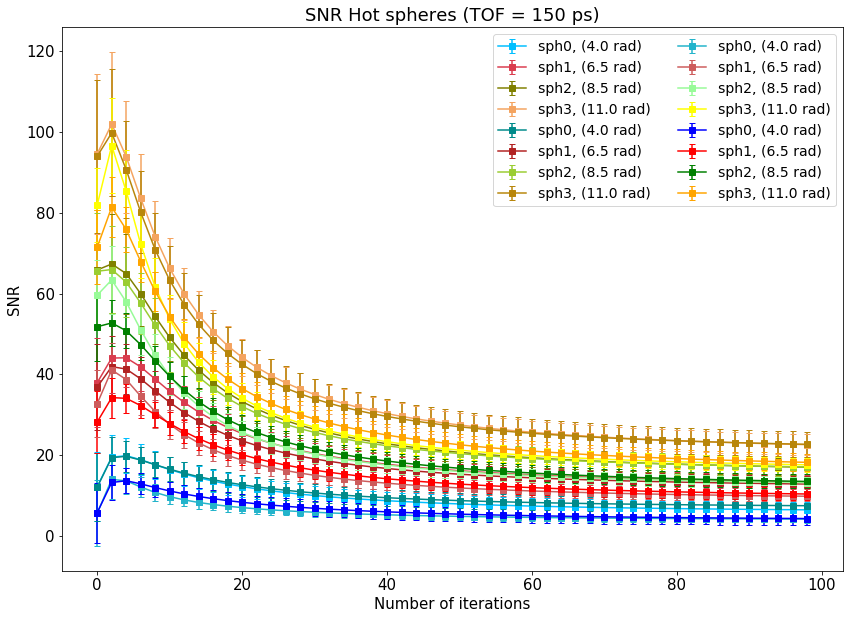

In [15]:
choose_tof = 150
plt.figure(figsize=(14,10))
plot_snr_sphs(snrs, range(num_hot), ths, colors, tof=choose_tof)
plt.title(f'SNR Hot spheres (TOF = {choose_tof} ps)')
plt.xlabel('Number of iterations')
plt.ylabel('SNR')
plt.legend(loc=1, fontsize=14, ncol=2);

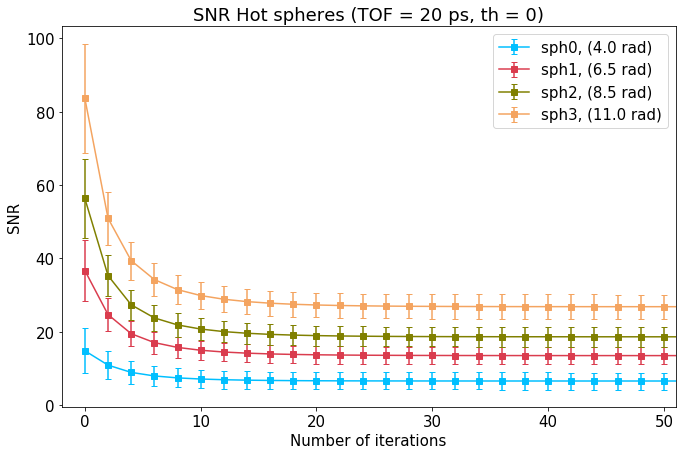

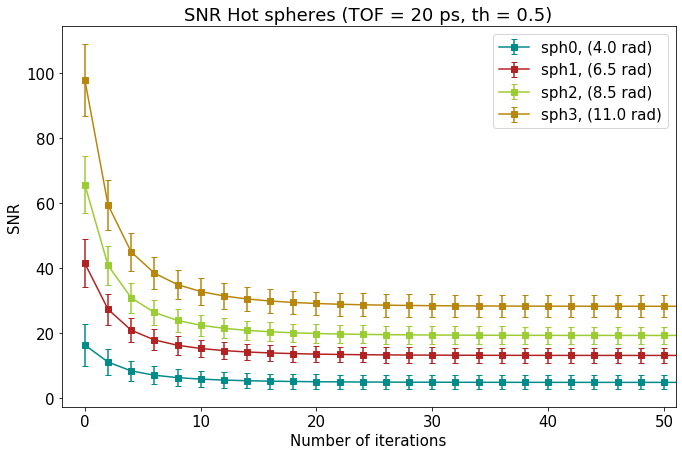

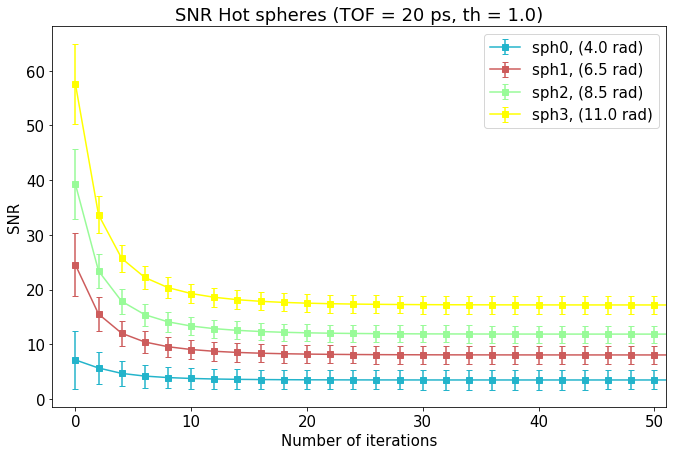

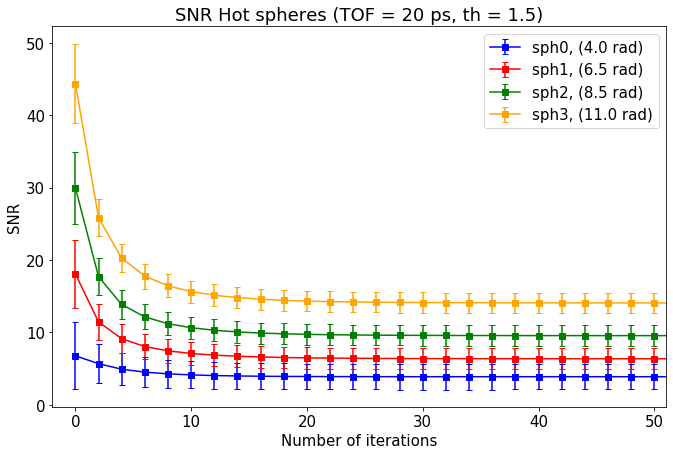

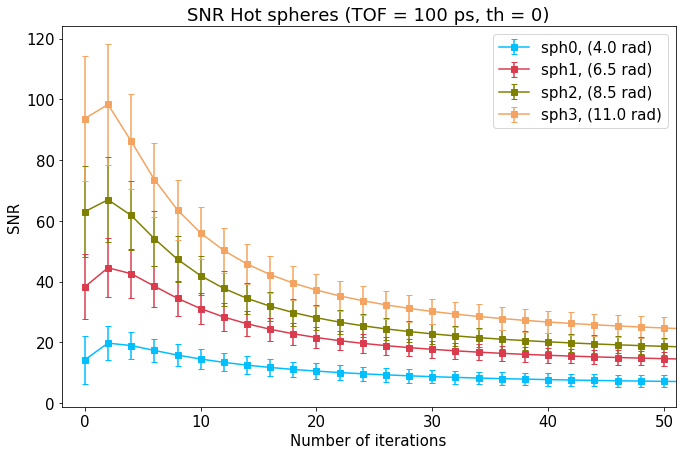

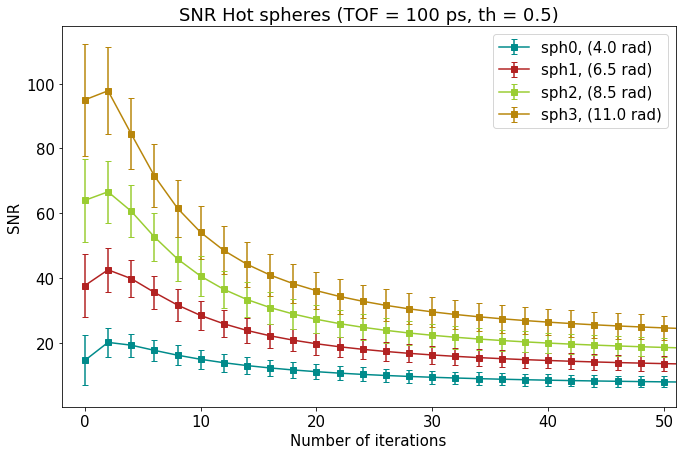

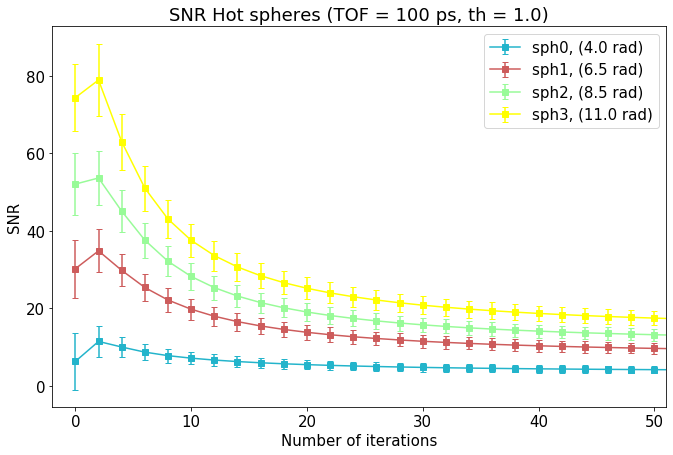

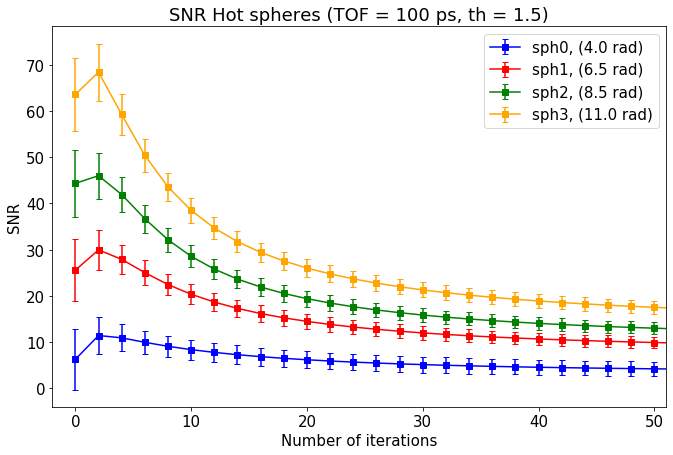

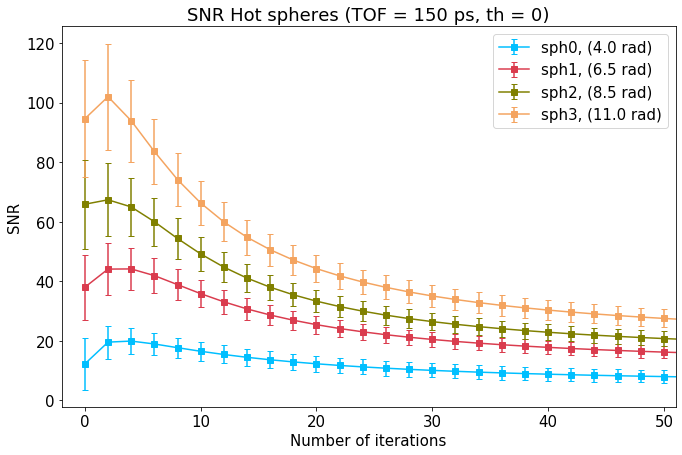

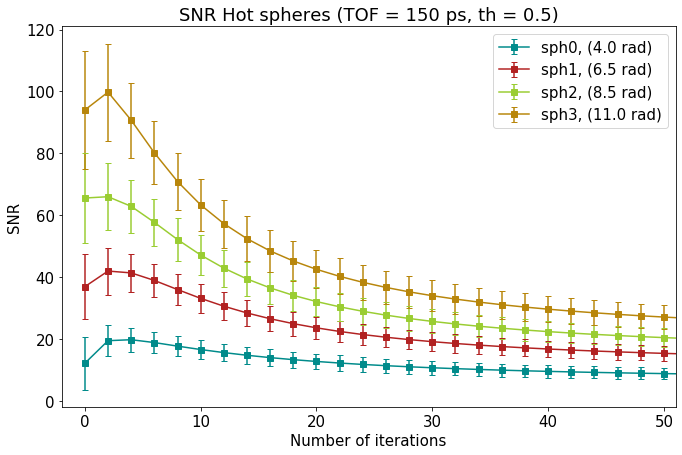

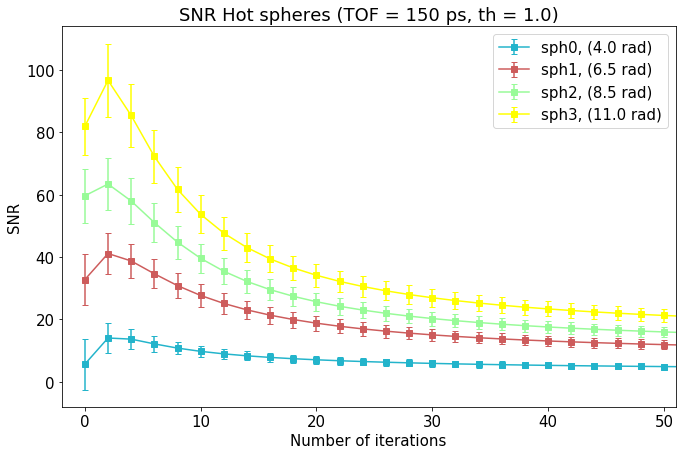

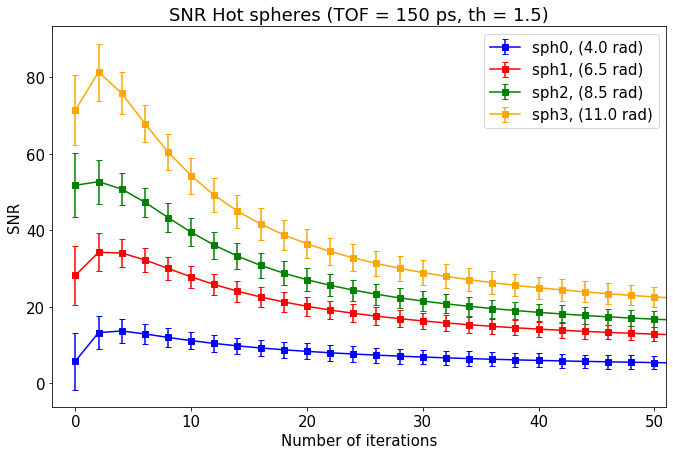

In [16]:
for tof in tofs:
    for i,th in enumerate(ths):
        plt.figure(figsize=(11,7))
        plot_snr_sphs(snrs, range(num_hot), ths[i:i+1], colors, tof=tof)
        plt.title(f'SNR Hot spheres (TOF = {tof} ps, th = {ths[i]})')
        plt.xlabel('Number of iterations')
        plt.ylabel('SNR')
        plt.xlim(-2, 51)
        plt.legend(loc=1, fontsize=15);

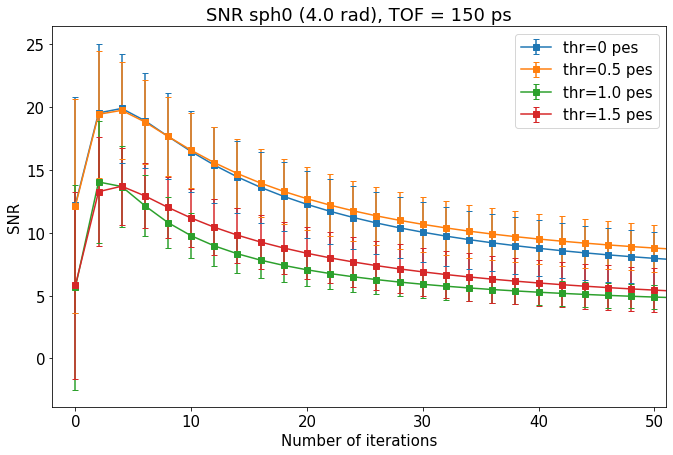

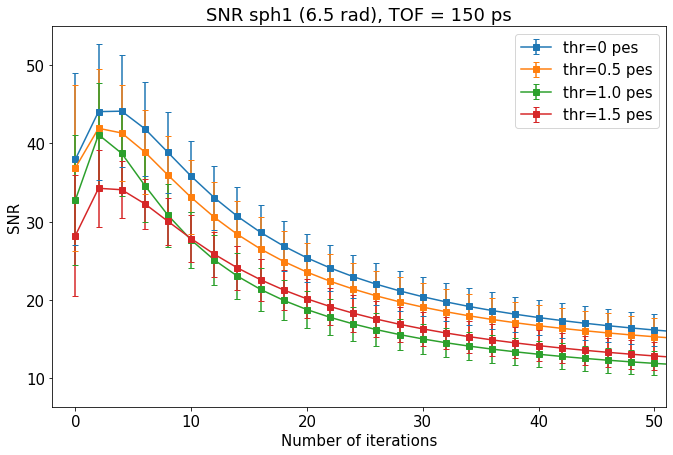

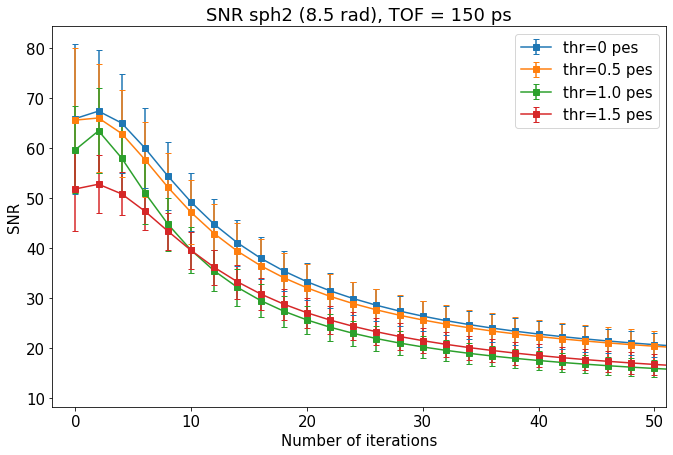

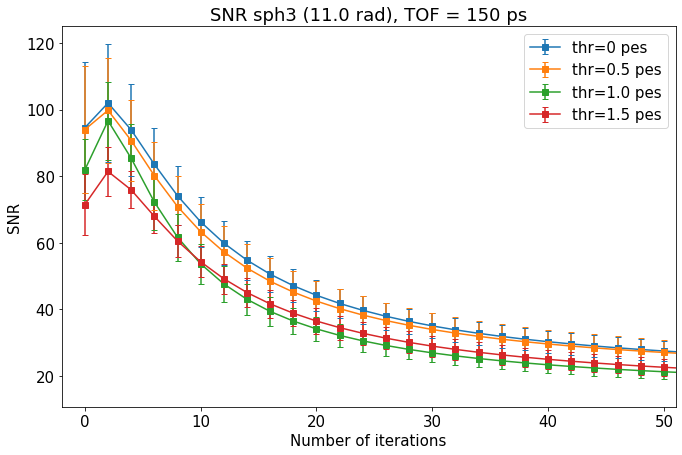

In [77]:
choose_tof = 150
for n_sphere in range(num_hot):
    plt.figure(figsize=(11,7))
    plot_snr_sphs2(snrs, range(n_sphere,n_sphere+1), ths, tof=choose_tof)
    plt.title(f'SNR sph{n_sphere} ({all_radii[n_sphere]} rad), TOF = {choose_tof} ps')
    plt.xlabel('Number of iterations')
    plt.ylabel('SNR')
    plt.xlim(-2, 51)
    plt.legend(loc=1, fontsize=15);

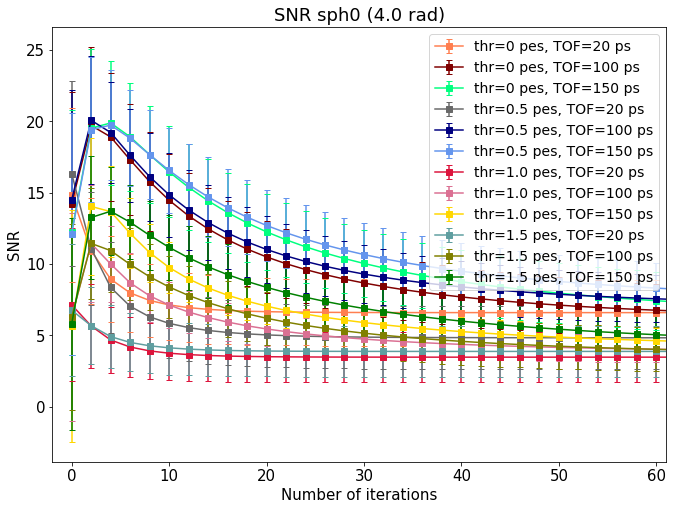

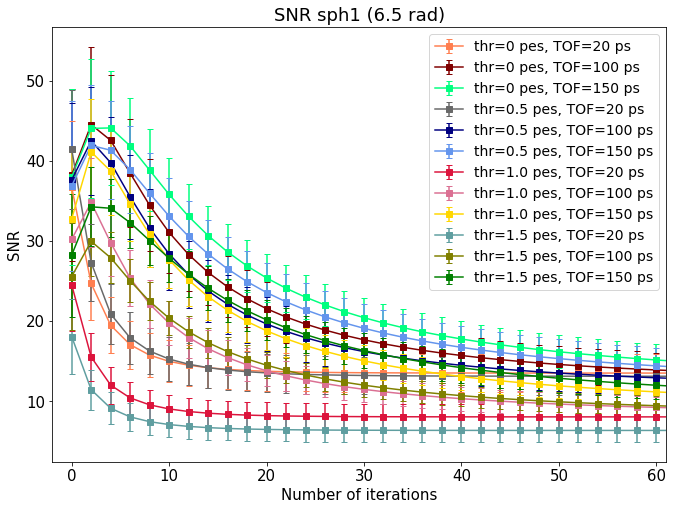

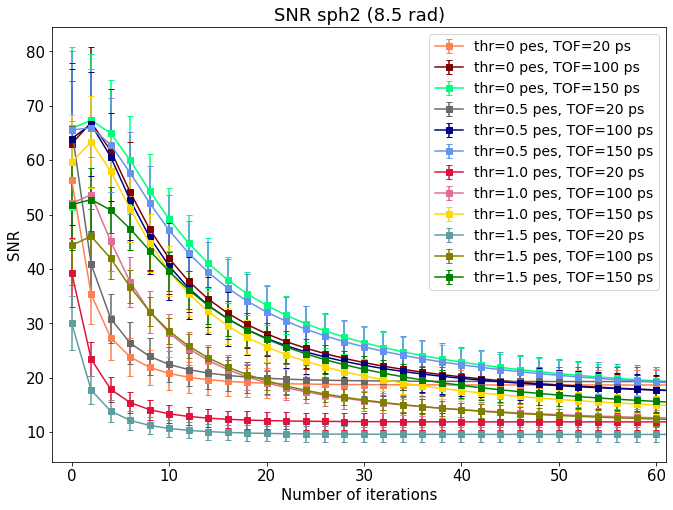

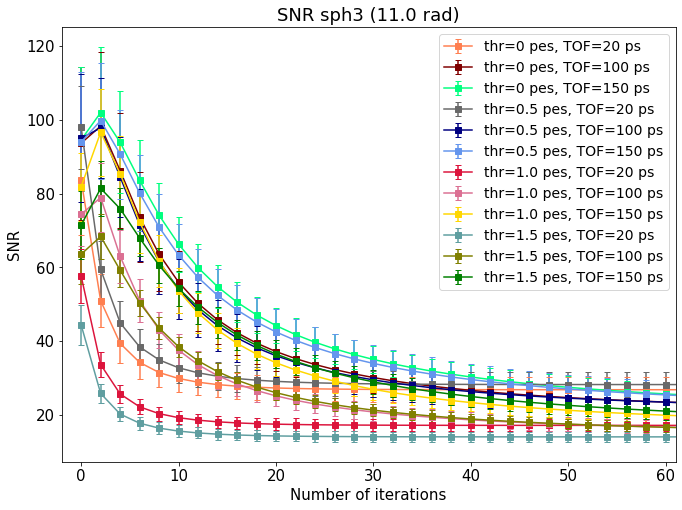

In [46]:
for n_sphere in range(num_hot):
    plt.figure(figsize=(11,8))
    plot_snr_sphs3(snrs, n_sphere, ths, tofs, colors_nice)
    plt.title(f'SNR sph{n_sphere} ({all_radii[n_sphere]} rad)')
    plt.xlabel('Number of iterations')
    plt.ylabel('SNR')
    plt.xlim(-2, 61)
    #plt.ylim(-5, 120)
    plt.legend(loc=1, fontsize=14);

## Cold spheres

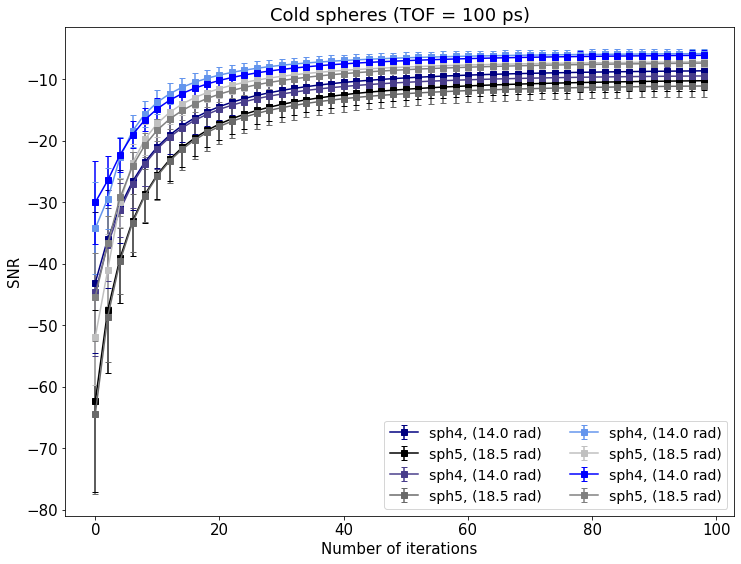

In [78]:
choose_tof = 100
plt.figure(figsize=(12,9))
plot_snr_sphs(snrs, range(4,6), ths, colors, tof=choose_tof)
plt.title(f'Cold spheres (TOF = {choose_tof} ps)')
plt.xlabel('Number of iterations')
plt.ylabel('SNR')
plt.legend(loc=4, fontsize=14, ncol=2);

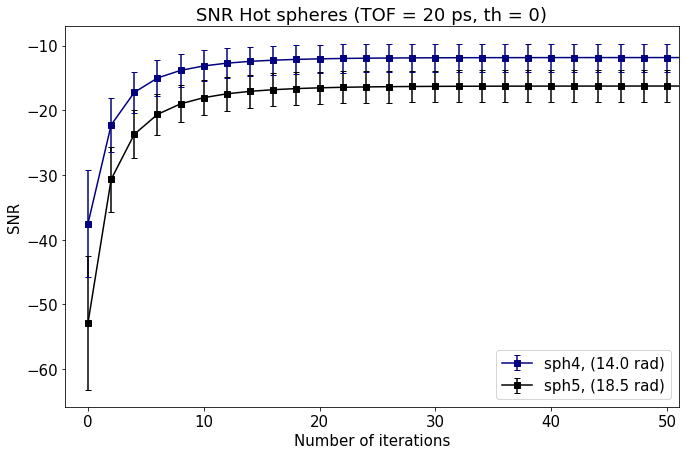

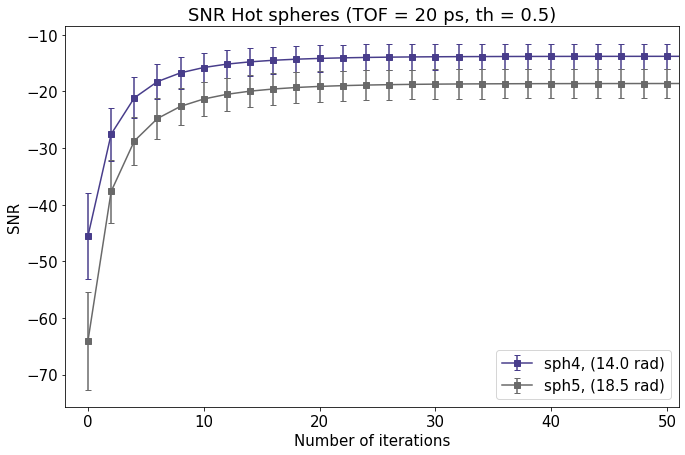

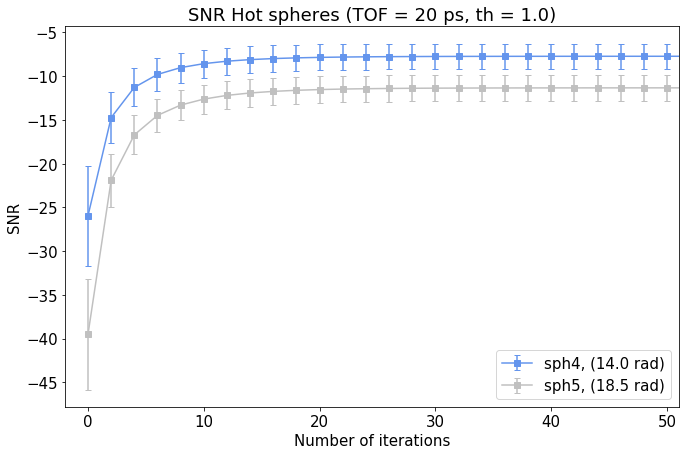

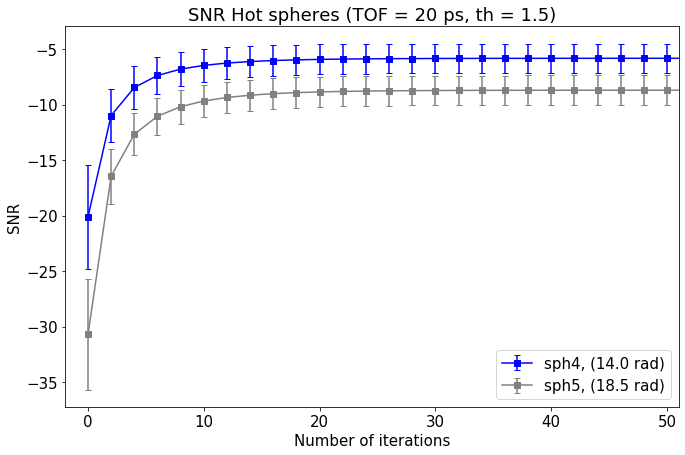

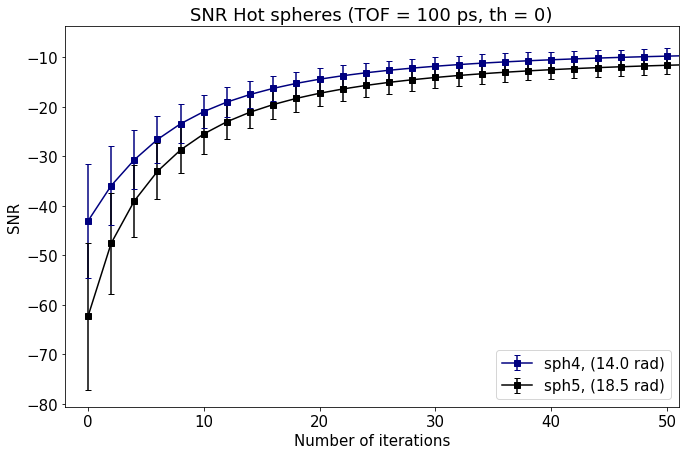

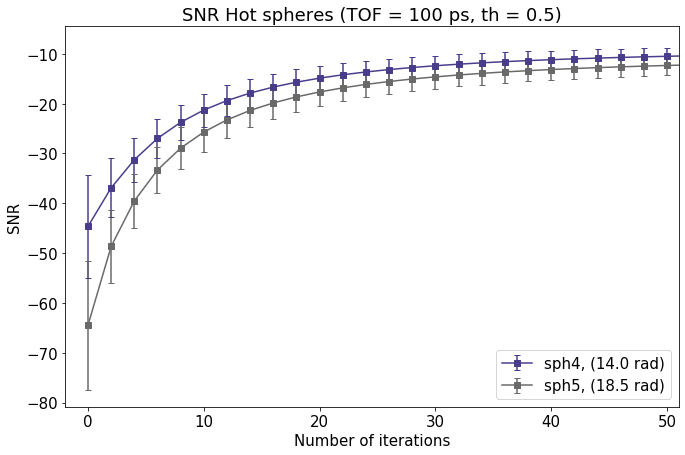

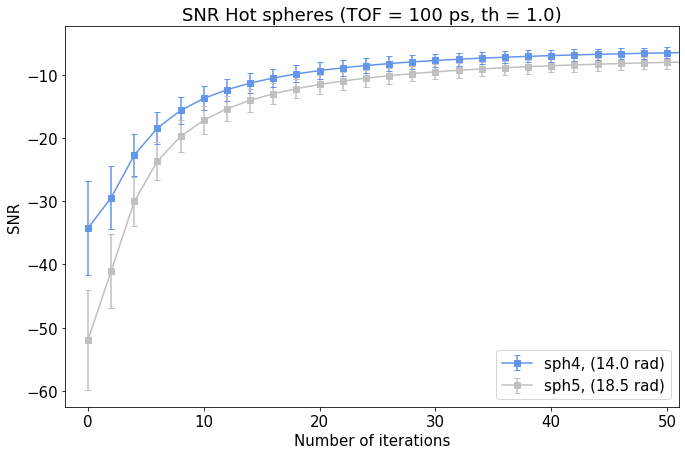

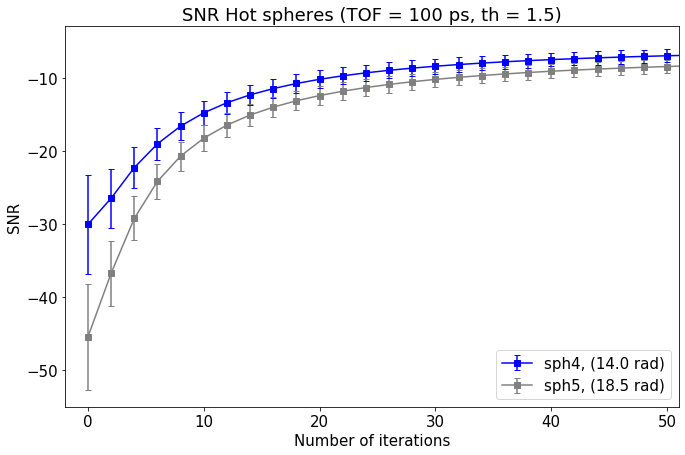

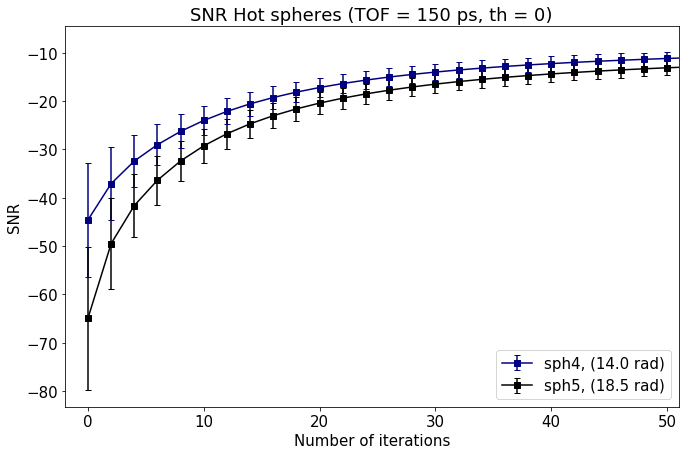

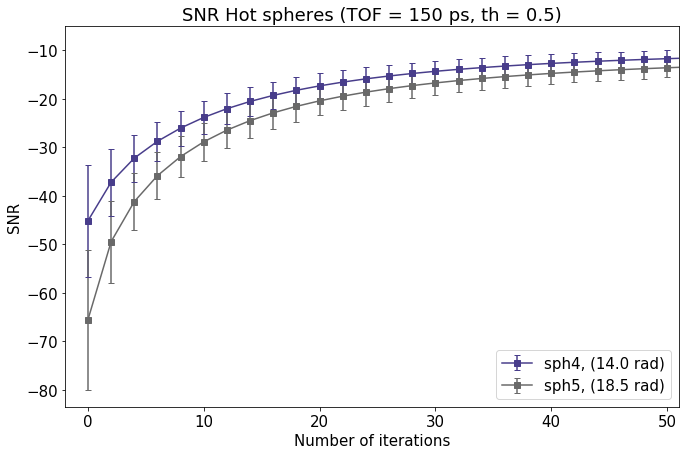

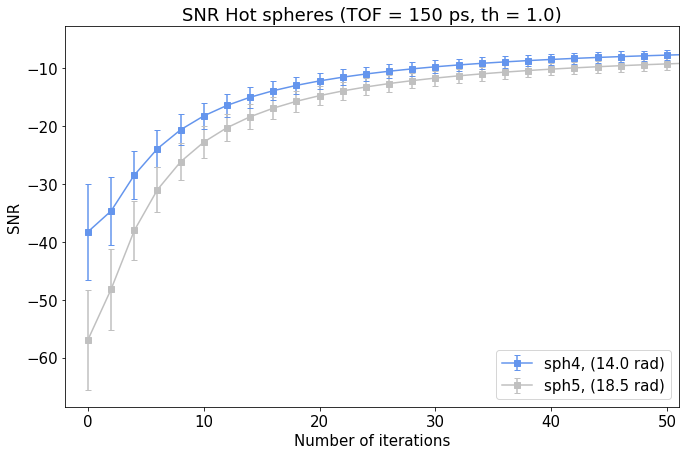

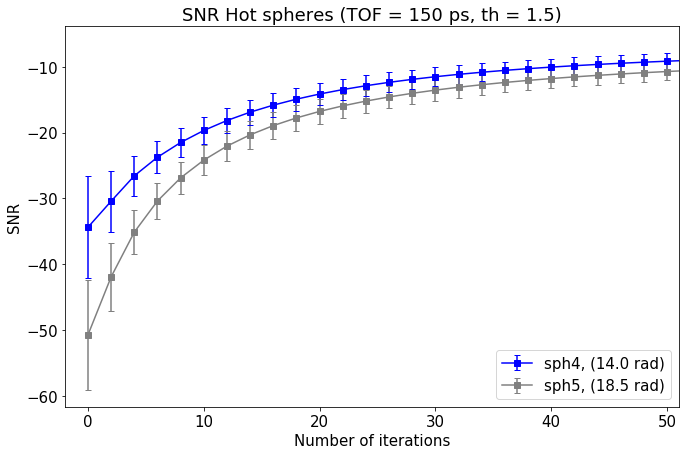

In [81]:
for tof in tofs:
    for i,th in enumerate(ths):
        plt.figure(figsize=(11,7))
        plot_snr_sphs(snrs, range(4,6), ths[i:i+1], colors, tof=tof)
        plt.title(f'SNR Hot spheres (TOF = {tof} ps, th = {ths[i]})')
        plt.xlabel('Number of iterations')
        plt.ylabel('SNR')
        plt.xlim(-2, 51)
        plt.legend(loc=4, fontsize=15);

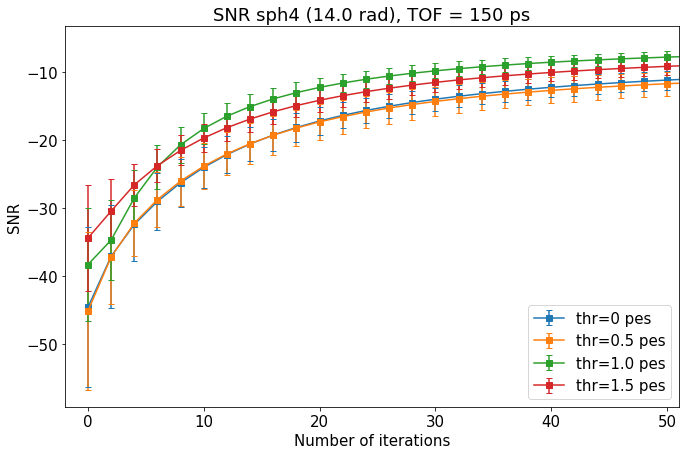

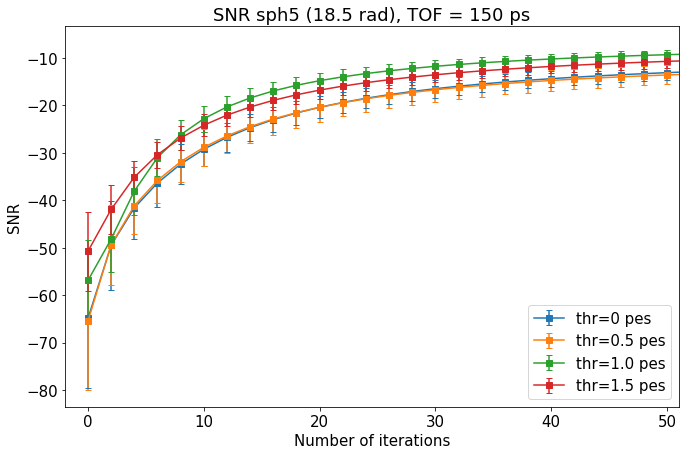

In [83]:
choose_tof = 150
for n_sphere in range(4,6):
    plt.figure(figsize=(11,7))
    plot_snr_sphs2(snrs, range(n_sphere,n_sphere+1), ths, tof=choose_tof)
    plt.title(f'SNR sph{n_sphere} ({all_radii[n_sphere]} rad), TOF = {choose_tof} ps')
    plt.xlabel('Number of iterations')
    plt.ylabel('SNR')
    plt.xlim(-2, 51)
    plt.legend(loc=4, fontsize=15);

### CRC

In [ ]:
crc_err = namedtuple('crc_err', 'crcs, errs')

def get_snrs(images, tof_and_thr, n_sph):
    calculate_snrs_and_errs = lambda images: fomf.snr3d(images, radii[n_sph], radial_pos, angles[n_sph], 
                                                        bckg_radius, phi0, phi_step, n_phi, 
                                                        x_size, y_size, z_size,
                                                        x_bins, y_bins, z_bins)
    all_images = tuple(map(calculate_snrs_and_errs, images[tof_and_thr]))
    snrs = [r[0] for r in all_images]
    errs = [e[1] for e in all_images]
    print(tof_and_thr, n_sph)
    return snr_err(snrs=snrs, errs=errs)

snrs = {sph_thresh_tof(sph=n_sph, th=th, tof=tof) :
        get_snrs(the_images, tof_threshold(tof=tof, th=th), n_sph)
        for tof   in tofs
        for th    in ths
        for n_sph in range(num_spheres)}